# Numerical Method Assignment
### Approximating edge of object in an image
Louis Widi Anandaputra 22/492218/PA/21090
<br>
## Introduction

Digital Images are an integral part of society in the twenty-first century. The rise of social media platforms as the new norms of communication has led companies to develop platforms where users are able to send and receive information in the form of digital images. First introduced by National Institute of Standards and Technology (NIST) in 1957, digital images had taken a big leap in its development and use [1]. Either it would be a representation of a real life image, captured by a digital camera which processes the image by sampling and quantizing to form a matrix representation or a synthesized digital image through manual annotation process or artificial intelligence-based generation by platforms such as DALL-E; digital images are regarded by many as inseparable with the human society. 


Through the various use of digital images, detecting edges are essential in many of the pattern recognition tasks, generative, or other processing forms in images. As edges in an image represent the border between two different regions of image, a differential equation calculating the difference between regions are able to be used in finding edges. Two different regions of image would usually have a <b>big value difference</b> and this would imply that the bigger the value difference in two regions, it means there <b>lies an edge between them</b> [2]. To calculate this difference, a first order differential equation would be used, iterating each pixel to find the difference between regions in both the x and y direction [3]. The first order derrivative would be approximated through the forward and backward difference for a more percise result in contrast to [3] which only used a forward difference.


After acquiring the magnitude of the difference between regions on both x and y direction, a threshold would be used. As different images would have different charactersitics, the threshold would then be able to be modified to attain the best edge representation. Through this work, future projects are encouraged to also consider higher order differential equations on calculating the difference between values on two regions. If the magnitude is bigger than the threshold, the value of the pixel in that specific location would be set to 1 (or 255) and 0 if it is lower than the threshold. Therefore, a representation in a grayscale 2-D image output would be able to be acquired.

## Defining the (important) libraries and functions

This project tries to explain the process of acquiring the edge of images without a predefined function through libraries. The only libraries being used are:
- Matplotlib : to read image files and visualize matrices as image
- numpy : only used to create blank matrices in this work
- math : only used to find the square root of a value in this work

In another context, the functions are as follows:
- grayscale_img : assuming the input is an RGB image, the need to convert into a 1-channel image is needed in this work
- pad_img : to add zeroes (0) as borders so that when the differential equations iterate over the image, it would not go out of bounds
- get_edge : this function would acquire edge by first calculating the difference in Lx and Ly where Lx and Ly are differential equations approximation, explaining the difference between two regions for a certain (x,y) pixel location

Lx(x,y) : (L(x+1,y) - L(x-1,y))/2<br>
Ly(x,y) : (L(x,y+1) - L(x, y-2))/2<br>
M(x,y) : square_root(power(Lx(x,y),2) + power(Ly(x,y),2))

L would be the image pixel value at x and y location and M would be the magnitude of the difference on x and y direction.

- The Magnitude M would then be compared to a threshold, if the magnitude is lower or same than the threshold, the value at location (x,y) would be 0 but if it is bigger than the threshold, it would be 1 (or 255) to represent a binary image consisting only the edge of the image.
- A threshold would be used as the grayscale image is constructed of a matrix of x width and y height with values from 0 until 255 representing the image values.

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# defining functions
## get grayscale image
def grayscale_image(img):
    # copying the values into different matrices
    ## red is the first channel
    red = img[:,:,0]
    
    ## green is the second channel
    green = img[:,:,1]
    
    ## blue is the third channel
    blue = img[:,:,2]

    # grayscale is required through a certain proportion of red green and blue
    grayscale_img = (0.299*red)+(0.587*green)+(0.114*blue)
    
    return grayscale_img

## get padding for images
def pad_image(img):
    # creating a blank matrix with a bigger size than original image
    pad_img = np.zeros((img.shape[0]+2, img.shape[1]+2))

    # iterating through the rows (i) and columns(j)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            # copying the original image value
            pad_img[i+1][j+1] = img[i][j]
            
    return pad_img
    
## get edge-extracted image
def get_edge(padded_img, threshold):
    # creating an empty matrix with the image shape of the original image
    edged_image = np.zeros((padded_img.shape[0]-2, padded_img.shape[1]-2))
    # iterating through the rows (i) and columns(j)
    for i in range(1, padded_img.shape[0]-1):
        for j in range(1, padded_img.shape[1]-1):
            # getting the difference in y direction of pixel i,j
            Ly = (padded_img[i+1][j] - padded_img[i-1][j])/2
            # getting the difference in x direction of pixel i,j
            Lx = (padded_img[i][j+1] - padded_img[i][j-1])/2
            # calculating the magintude of change
            magnitude = math.sqrt((Lx*Lx)+(Ly*Ly))
            # putting the magnitude into the image
            edged_image[i-1][j-1] = magnitude
    
    # setting the threshold while iterating through the rows (i) and columns(j)
    for i in range(0, edged_image.shape[0]):
        for j in range(0, edged_image.shape[1]):
            if edged_image[i][j]>threshold:
                edged_image[i][j] = 255
            else:
                edged_image[i][j] = 0

    return edged_image

## Acquiring the original RGB image

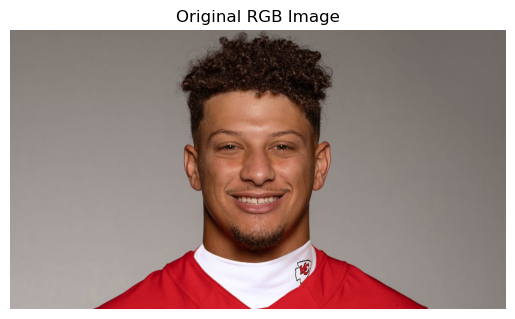

In [3]:
img = plt.imread('mahomes.jpeg')
plt.title("Original RGB Image")
plt.axis("off")
plt.imshow(img)
plt.show()

## Conversion to grayscale

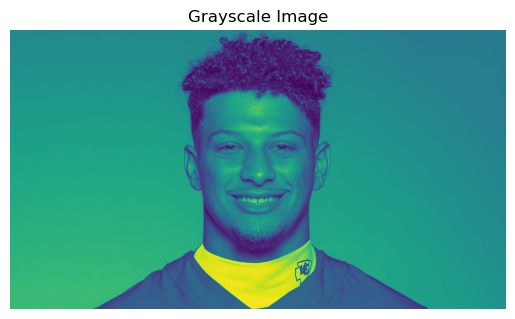

In [4]:
grayscale_img = grayscale_image(img)
plt.title("Grayscale Image")
plt.axis("off")
plt.imshow(grayscale_img)
plt.show()

## Adding padding

In [5]:
padded_grayscale = pad_image(grayscale_img)
# verifying the padding on the matrix
print(padded_grayscale)

[[  0.      0.      0.    ...   0.      0.      0.   ]
 [  0.    120.409 120.409 ... 106.05  106.05    0.   ]
 [  0.    120.409 120.409 ... 106.05  106.05    0.   ]
 ...
 [  0.    172.164 172.164 ... 129.05  129.05    0.   ]
 [  0.    172.164 172.164 ... 129.05  129.05    0.   ]
 [  0.      0.      0.    ...   0.      0.      0.   ]]


## Extracting the edges

This extraction of edges are done with various threshold. This section would explore the use of different values of threshold and its effects to the image.

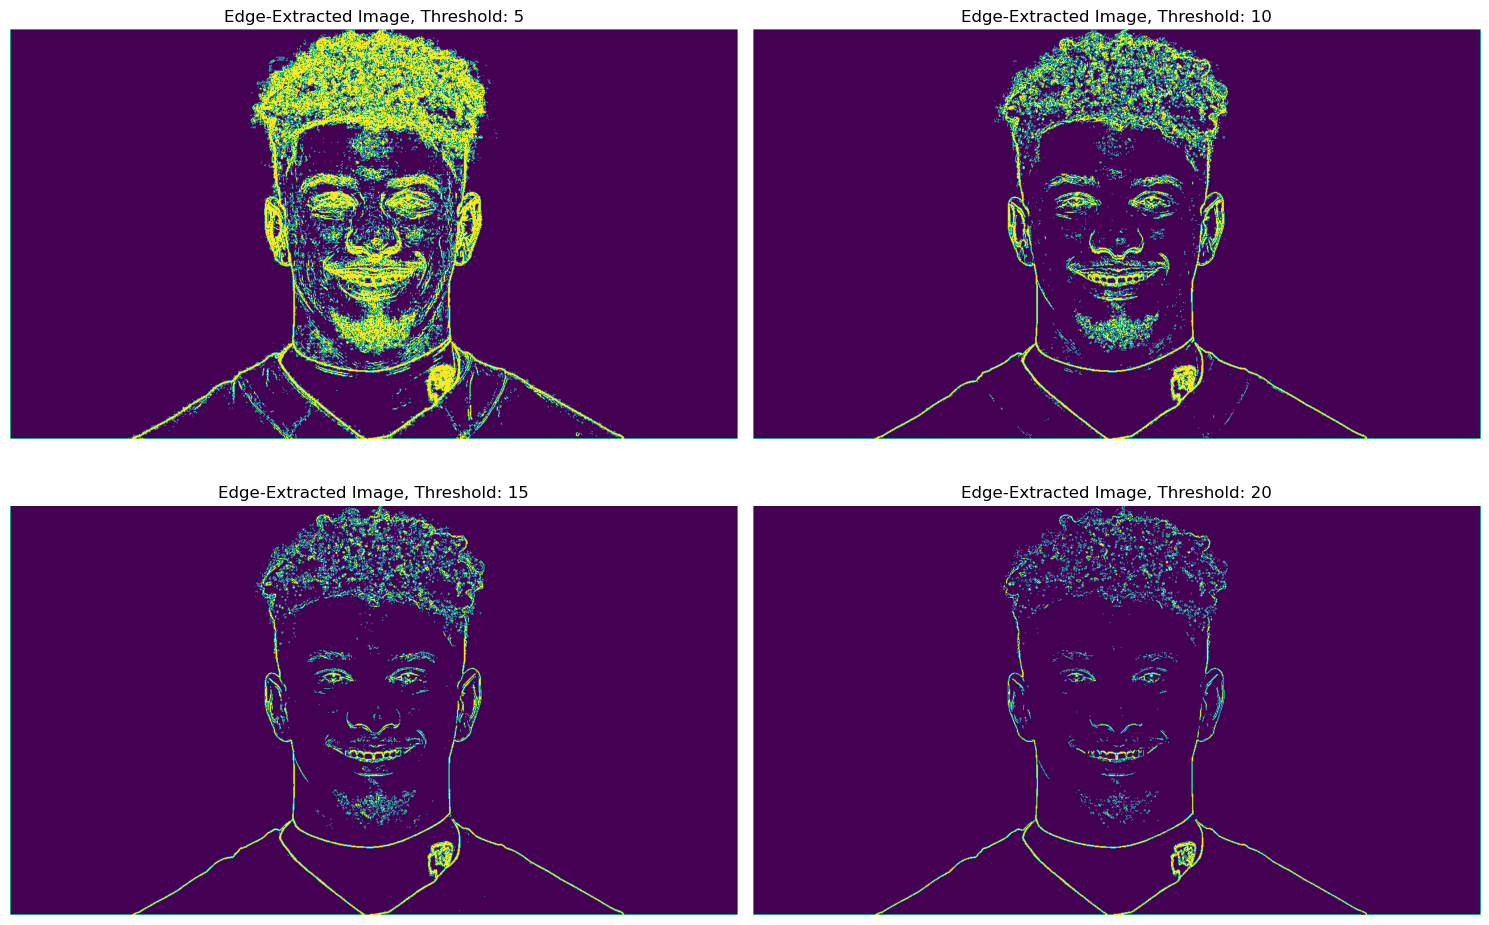

In [6]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (15,10))
# getting images of various threshold
edged_5 = get_edge(padded_grayscale, 5)
edged_10 = get_edge(padded_grayscale, 10)
edged_15 = get_edge(padded_grayscale, 15)
edged_20 = get_edge(padded_grayscale, 20)


# visualizing the thresholded image
ax[0][0].set_title("Edge-Extracted Image, Threshold: 5")
ax[0][0].axis("off")
ax[0][0].imshow(edged_5)

ax[0][1].set_title("Edge-Extracted Image, Threshold: 10")
ax[0][1].axis("off")
ax[0][1].imshow(edged_10)

ax[1][0].set_title("Edge-Extracted Image, Threshold: 15")
ax[1][0].axis("off")
ax[1][0].imshow(edged_15)

ax[1][1].set_title("Edge-Extracted Image, Threshold: 20")
ax[1][1].axis("off")
ax[1][1].imshow(edged_20)

plt.tight_layout()
plt.show()

As the threshold gets higher, the less details the edged image has. This is due to the fact that the threshold is used to determine <i>how big</i> the difference between region is. Therefore, if the threshold is set to be low, more details would be present and the opposite would apply. This would sum the edge detection project.

## Reference
[1] NIST. "First Digital Image."(Online). 2022. Accessed through: https://www.nist.gov/mathematics-statistics/first-digital-image on 9 March 2024.

[2] R. Jain, R. Kasturi, and B. G. Schunck, Machine vision. USA: McGraw-Hill, Inc., 1995.

[3] Abdulbasit Alazzawi, “EDGE DETECTION-APPLICATION OF (FIRST AND SECOND) ORDER DERIVATIVE IN IMAGE PROCESSING: Communication”, DJES, pp. 430–440, Dec. 2015.

© 2024 - Louis Widi Anandaputra